In [1]:
import pandas as pd
import pickle

import numpy as np
import math
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import  Ridge, Lasso
from sklearn.preprocessing import StandardScaler

%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

import seaborn as sns

In [2]:
with open('data/pickles/29feat_formodeling.pickle', 'rb') as to_read:
    df = pickle.load(to_read)

In [3]:
X = df.drop('log_grad_rate', axis = 1)
y = df.log_grad_rate


In [4]:
X.shape

(236, 29)

In [5]:
#alpha_cands = np.arange(.001,10.001,.1)
alpha_cands = np.arange(.001,.01,.001)

best_alpha_rsquared = 0
best_alpha = 0
for alpha_candidate in alpha_cands:
    kf_lasso_train_scores = []
    kf_lasso_test_scores = []
    lasso = Lasso(alpha = alpha_candidate)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    kf_splits = kf.split(X,y)                            
                                
    for train_ind, test_ind in kf_splits:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X.iloc[train_ind])
        y_train = y.iloc[train_ind]

        lasso.fit(X_train_scaled, y_train)
        X_test_scaled = scaler.transform(X.iloc[test_ind])
        y_test        = y.iloc[test_ind]

        kf_lasso_train_scores.append(lasso.score(X_train_scaled, y_train))
        kf_lasso_test_scores.append(lasso.score(X_test_scaled, y_test))

    
    if (sum(kf_lasso_test_scores)/len(kf_lasso_test_scores)) > best_alpha_rsquared:
        best_alpha = alpha_candidate
        best_alpha_rsquared = (sum(kf_lasso_test_scores)/len(kf_lasso_test_scores))



/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to fl

In [6]:
print(best_alpha_rsquared)
print(best_alpha)

0.5101475698242519
0.009000000000000001


## Lasso to find good coeficients

In [7]:
#Don't keep holdout set since the sample is small. KFolds validation is enough.
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [8]:
#best alpha taken from iterative method
lasso = Lasso(alpha = .009)

In [9]:
train_r2 = []
val_r2 = []
for train, val in kf.split(X,y):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X.iloc[train])
    y_train = y.iloc[train]
    lasso.fit(X_train, y_train)
    train_r2.append(lasso.score(X_train, y_train))
    
    X_val = scaler.transform(X.iloc[val])
    y_val = y.iloc[val]
    val_r2.append(lasso.score(X_val, y_val))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with inpu

In [10]:
for feature, coef in zip(list(X), lasso.coef_):
    print(feature, coef)


Student_Count_Total -0.07382574369681526
Zip_Mean_Income -0.019990406072864942
Fully Accessible -0.0030064688257262686
Generally accessible 0.0
Student_Count_Asian_perc 0.0
Student_Count_Asian_Pacific_Islander_perc -0.08925203696806944
Student_Count_Black_perc 0.046197556511712735
Student_Count_English_Learners_perc 0.1075206018806714
Student_Count_Ethnicity_Not_Available_perc 0.05081807618792615
Student_Count_Hawaiian_Pacific_Islander_perc -0.018927459518291216
Student_Count_Hispanic_perc -0.23088329288443807
Student_Count_Low_Income_perc 0.09645976838753252
Student_Count_Multi_perc -0.21298779343395427
Student_Count_Native_American_perc 0.11951166165443136
Student_Count_Other_Ethnicity_perc 0.0
Student_Count_Special_Ed_perc 0.2544988455522342
Student_Count_White_perc -0.0
Classroom_Languages_count -0.012358210647012449
Blue 0.03951721359725967
Brown -0.0
Green -0.07953870980656443
Orange 0.0
Pink 0.0
Purple 0.029454932186084887
Red -0.0024877598843216116
Dress_Code_dummie -0.05101776

In [11]:
X = df.drop(columns = ['Generally accessible', 'Student_Count_Asian_perc', 
                        'Student_Count_Other_Ethnicity_perc','Student_Count_White_perc', 'Brown',
                       'Orange', 'Pink', 'Student_Count_Multi_perc', 'log_grad_rate',
                      'Student_Count_Native_American_perc',
                      'Student_Count_Asian_Pacific_Islander_perc',
                       'Student_Count_Hawaiian_Pacific_Islander_perc'
                      ])
#Native American was not culled by the LASSO, however, when converted to 
# take into account initial log transform, the coefficient is so large 
# it makes no sense.

In [12]:
list(X)

['Student_Count_Total',
 'Zip_Mean_Income',
 'Fully Accessible',
 'Student_Count_Black_perc',
 'Student_Count_English_Learners_perc',
 'Student_Count_Ethnicity_Not_Available_perc',
 'Student_Count_Hispanic_perc',
 'Student_Count_Low_Income_perc',
 'Student_Count_Special_Ed_perc',
 'Classroom_Languages_count',
 'Blue',
 'Green',
 'Purple',
 'Red',
 'Dress_Code_dummie',
 'grades_offered_count',
 'charter',
 'gender_f_bn']

In [13]:
kf = KFold(n_splits = 5, shuffle=True, random_state=42)

r2_train = []
r2_test =   []
mse = []
for train, test in kf.split(X,y):
    lm = LinearRegression()
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_test, y_test     = X.iloc[test], y.iloc[test]
    
    lm.fit(X_train, y_train)
    r2_train.append(lm.score(X_train, y_train))
    r2_test.append(lm.score(X_test, y_test))
    
    predict_test = lm.predict(X_test)
    untransformed_x_predict = np.e**predict_test
    untransformed_y = np.e**y_test
    mse.append(mean_squared_error(untransformed_x_predict, untransformed_y))

In [14]:
average_mse = (sum(mse)/len(mse))
print(math.sqrt(average_mse))
print(sum(r2_train)/len(r2_train))
#Mean r-squared on the test sets in the k-fold
print(sum(r2_test)/len(r2_test))

18.79707168109337
0.6076838070846869
0.4166196134066643


In [15]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
lm.coef_

array([-2.59785799e-05, -1.60220894e-06, -8.36631065e-02,  1.00865763e+00,
        1.76774993e+00, -3.04854699e+00,  1.84625680e-01,  5.02504096e-01,
        1.68548511e+00, -7.47196294e-02,  1.18187058e-01, -2.43514232e-01,
        6.85406046e-02, -4.96104229e-02, -1.00504913e-01,  6.99032979e-02,
       -2.41050979e-01, -2.60251658e-02])

In [17]:
#transform each coeffient with e**coef in order to interpret model, 
#which was fit on log(failed_to_graduate_rate)

In [18]:
for feature, coef in zip(X,lm.coef_):
    print(feature, np.e**coef)

Student_Count_Total 0.9999740217575834
Zip_Mean_Income 0.9999983977923474
Fully Accessible 0.9197410586619666
Student_Count_Black_perc 2.7419178770747488
Student_Count_English_Learners_perc 5.857658372410834
Student_Count_Ethnicity_Not_Available_perc 0.0474277874702166
Student_Count_Hispanic_perc 1.2027681356874445
Student_Count_Low_Income_perc 1.6528550008885463
Student_Count_Special_Ed_perc 5.395067502113359
Classroom_Languages_count 0.9280036347785077
Blue 1.1254546173813118
Green 0.7838683203235154
Purple 1.070944109309712
Red 0.9516000739057021
Dress_Code_dummie 0.9043806688470621
grades_offered_count 1.0724044724302653
charter 0.7858015661430984
gender_f_bn 0.9743105700012313


In [19]:
y_hat = np.e**lm.predict(X)
y = np.e**y

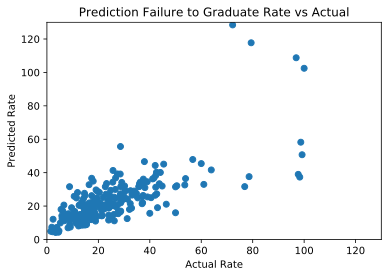

In [20]:
plt.scatter(y, y_hat)
plt.title('Prediction Failure to Graduate Rate vs Actual')
plt.xlabel('Actual Rate')
plt.ylabel('Predicted Rate')
plt.xlim(0,130)
plt.ylim(0, 130)
plt.savefig('Presentation/PredvsAct.svg')

In [21]:
residuals = y - y_hat

Text(0, 0.5, 'Residuals')

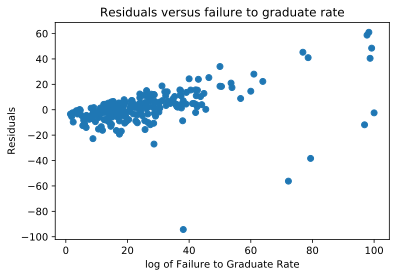

In [24]:
plt.scatter(y,residuals)
plt.title('Residuals versus failure to graduate rate')
plt.xlabel('log of Failure to Graduate Rate')
plt.ylabel('Residuals')

## Prediction

In [25]:
print(list(X))

['Student_Count_Total', 'Zip_Mean_Income', 'Fully Accessible', 'Student_Count_Black_perc', 'Student_Count_English_Learners_perc', 'Student_Count_Ethnicity_Not_Available_perc', 'Student_Count_Hispanic_perc', 'Student_Count_Low_Income_perc', 'Student_Count_Special_Ed_perc', 'Classroom_Languages_count', 'Blue', 'Green', 'Purple', 'Red', 'Dress_Code_dummie', 'grades_offered_count', 'charter', 'gender_f_bn']


In [26]:
X
['800',70000, 1, .10, .25, 0.00, .25, .4, .1, 3, 1,0,0,0, 1, 4, 0, 1]

['800', 70000, 1, 0.1, 0.25, 0.0, 0.25, 0.4, 0.1, 3, 1, 0, 0, 0, 1, 4, 0, 1]

In [27]:
prediction_X = [[800,70000, 1, .10, .05, 0.00, .25, .4, .1, 3, 1,0,0,0, 1, 4, 0, 1]]
# prediction_X.reshape(1,-1)

In [28]:
failed_to_graduate_rate = np.e**float(lm.predict(prediction_X))

In [29]:
#Prediction of grad rate of a high school with 800 students, mean zip income of 70,000
#Fully Accessible, 10% black, 25% ELL, 25% hispanic, 40% low income, 10% special ed,
#3 languages taught, on the blue line, 9-12 grades, not a charter, with a female principle
Graduation_Rate = 100-failed_to_graduate_rate
print(Graduation_Rate)

91.58227608449863


## Lars

In [30]:
from sklearn.linear_model import lars_path

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, random_state = 42)


In [32]:
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)
X_tr.dtype

dtype('float64')

In [33]:
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso')

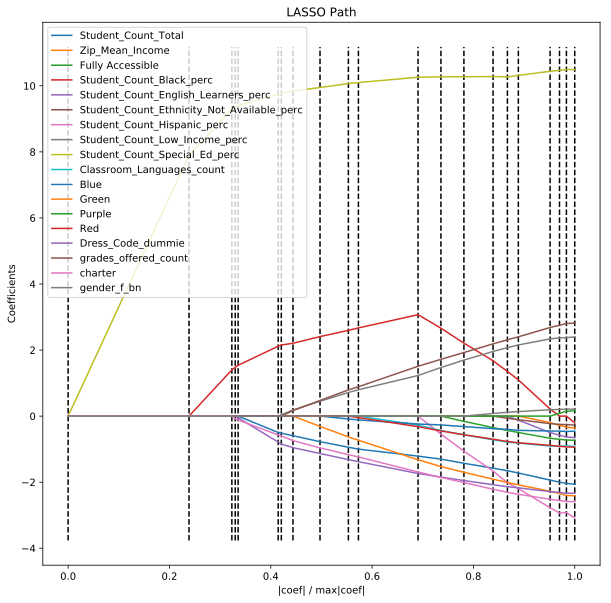

In [34]:
# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.savefig('Presentation/Lars.svg')
plt.show()
